In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_hero_names = pd.read_csv('data/hero_names.csv')
df_match = pd.read_csv('data/match.csv')
df_players = pd.read_csv('data/players.csv')

In [2]:
# HEROES
df_hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [3]:
df_match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [4]:
df_players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Usually bots have account_id < 0, so we can exclude them, let's check how many of them in dataframe
df_players[df_players['account_id'] < 0]['account_id'].count()

0

In [6]:
# As we can see there are no bots in our dataset, we don’t need an account_id information for our experiment and now we can subset a dataframe, leaving only interested columns.
df_players_selection = df_players[['match_id', 'hero_id', 'player_slot','gold', 'gold_spent', 'kills', 'deaths', 'assists', 'denies', 'last_hits', 'hero_damage', 'tower_damage', 'hero_healing', 'level', 'xp_hero', 'xp_creep', 'xp_roshan', 'xp_other']]

In [7]:
# Check for NaN values
df_players_selection.isnull().sum().sort_values(ascending=False)

xp_roshan       320438
xp_other         21036
xp_hero           1883
xp_creep            68
hero_id              0
level                0
hero_healing         0
tower_damage         0
hero_damage          0
match_id             0
denies               0
assists              0
deaths               0
kills                0
gold_spent           0
gold                 0
player_slot          0
last_hits            0
dtype: int64

In [8]:
# Replace NaN values with 0
df_players_selection.fillna(0, inplace=True)

# Check for NaN values again
df_players_selection.isnull().sum()

/Users/mirlan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


match_id        0
hero_id         0
player_slot     0
gold            0
gold_spent      0
kills           0
deaths          0
assists         0
denies          0
last_hits       0
hero_damage     0
tower_damage    0
hero_healing    0
level           0
xp_hero         0
xp_creep        0
xp_roshan       0
xp_other        0
dtype: int64

In [9]:
# Rename columns
df_players_selection.rename(columns={'gold': 'gold_left', 'level': 'level_end_match'}, inplace=True)

# Sum total gold
df_players_selection['gold_total'] = df_players_selection['gold_left'] + df_players_selection['gold_spent']

# Sum total xp
df_players_selection['xp_total'] = df_players_selection['xp_hero'] + df_players_selection['xp_creep'] + df_players_selection['xp_roshan'] + df_players_selection['xp_other']

# Drop unneeded columns
df_players_selection.drop(columns=['gold_spent', 'xp_hero', 'xp_creep', 'xp_roshan', 'xp_other'], inplace=True)

/Users/mirlan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/mirlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mirlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [11]:
# Radiant or Dire win
df_match_selected = df_match[['match_id', 'radiant_win']]
df_match_selected.head()

,match_id,radiant_win
0,0,True
1,1,False
2,2,False
3,3,False
4,4,True


In [12]:
# Merge data about match winners
df_players_match_winners = pd.merge(df_players_selection, df_match_selected, on='match_id', how='left')

In [13]:
# Now when we merged dataframes based on information about player slot we can detect team of a player - Radiant or Dire and add new column team. Additionally we will add column with the information about win or lose match for each player using previously added column radiant_win.

for i in range(0, 5):
    df_players_match_winners.loc[df_players_match_winners['player_slot'] == i, 'team'] = 'radiant'

for i in range(128, 133):
    df_players_match_winners.loc[df_players_match_winners['player_slot'] == i, 'team'] = 'dire'

df_players_match_winners['win_match'] = np.where((df_players_match_winners['radiant_win'] == True) & (df_players_match_winners['team'] == 'radiant'), 1, np.where((df_players_match_winners['radiant_win'] == False) & (df_players_match_winners['team'] == 'dire'), 1, 0))

In [14]:
# Now let's add information about hero name to our dataframe, it will help us in future to understand the in game name of hero, not hero_id. This is more representative information
df_hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [15]:
# I will not go deep into details, but while working with dataframes I have found two issues. In hero names dataframe, id starts from 1 and goes up to 113, and there is no hero with id 24. But in players dataframe hero_id starts from 0 and goes up to 112. So we need to fix it.
df_hero_names['hero_id'].min(), df_hero_names['hero_id'].max()

(1, 113)

In [16]:
df_players_match_winners['hero_id'].min(), df_players_match_winners['hero_id'].max()

(0, 112)

In [17]:
df_hero_names[df_hero_names['hero_id'] == 24]

,name,hero_id,localized_name


In [18]:
df_players_match_winners[df_players_match_winners['hero_id'] == 24]

,match_id,hero_id,player_slot,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,tower_damage,hero_healing,level_end_match,gold_total,xp_total,radiant_win,team,win_match


In [19]:
# To fix it we will update hero_id in df_hero_names by reducing it by 1. Except 25 id, because we do not have 24 id in df_hero_names it will be reduced by 2 and get place of 23 id
# Add new column hero_id_new and add values hero_id - 1 to match with df_hero_names

for i in range(1, 114):
    if i == 25:
        df_hero_names.loc[df_hero_names['hero_id'] == i, 'hero_id_new'] = i - 2
    else:
        df_hero_names.loc[df_hero_names['hero_id'] == i, 'hero_id_new'] = i - 1
df_hero_names['hero_id_new'] = df_hero_names['hero_id_new'].astype(int)

In [20]:
df_hero_names.head()

,name,hero_id,localized_name,hero_id_new
0,npc_dota_hero_antimage,1,Anti-Mage,0
1,npc_dota_hero_axe,2,Axe,1
2,npc_dota_hero_bane,3,Bane,2
3,npc_dota_hero_bloodseeker,4,Bloodseeker,3
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,4


In [21]:
# Now when we have made same ids in both dataset we can merge them by hero_id and hero_id_new respectivly
df_players_matches_win_heroes = pd.merge(df_players_match_winners, df_hero_names, left_on='hero_id', right_on='hero_id_new', how='left')
df_players_matches_win_heroes[df_players_matches_win_heroes['name'].isna()]

,match_id,hero_id_x,player_slot,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,...,level_end_match,gold_total,xp_total,radiant_win,team,win_match,name,hero_id_y,localized_name,hero_id_new


In [22]:
# example
# if we didn't have hero_id_new column in df_hero_names we could merge them by hero_id and hero_id_new, but we would get NaN values in name column. Because there are no 0 hero_id in df_hero_names, and it also could be problem with other hero_id's, the names of heroes at the end could be not relevant to real hero_id's
df_players_matches_win_heroes_example = pd.merge(df_players_match_winners, df_hero_names, on='hero_id', how='left')
df_players_matches_win_heroes_example[df_players_matches_win_heroes_example['name'].isna()]

,match_id,hero_id,player_slot,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,...,hero_healing,level_end_match,gold_total,xp_total,radiant_win,team,win_match,name,localized_name,hero_id_new
7203,720,0,3,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
10320,1032,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
11088,1108,0,131,0,0,0,0,0,0,0,...,0,0,0,0.0,True,dire,0,NaN,NaN,NaN
21343,2134,0,3,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
21344,2134,0,4,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
27738,2773,0,131,0,0,0,0,0,0,0,...,0,0,0,0.0,True,dire,0,NaN,NaN,NaN
70983,7098,0,3,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
74882,7488,0,2,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN
75829,7582,0,132,0,0,0,0,0,0,0,...,0,0,0,0.0,True,dire,0,NaN,NaN,NaN
78314,7831,0,4,0,0,0,0,0,0,0,...,0,0,0,0.0,False,radiant,0,NaN,NaN,NaN


In [25]:
# Let's drop some columns that we do not need anymore
df_pre_cleared = df_players_matches_win_heroes.drop(columns=['hero_id_x', 'player_slot', 'name', 'hero_id_y'])
df_pre_cleared.head()

,match_id,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,tower_damage,hero_healing,level_end_match,gold_total,xp_total,radiant_win,team,win_match,localized_name,hero_id_new
0,0,3261,9,3,18,1,30,8690,143,218,16,14221,14363.0,True,radiant,1,Disruptor,86
1,0,2954,13,3,18,9,109,23747,423,0,22,20714,26125.0,True,radiant,1,Leshrac,51
2,0,110,0,4,15,1,58,4217,399,1595,17,12305,15257.0,True,radiant,1,Ogre Magi,83
3,0,1179,8,4,19,6,271,14832,6055,2714,21,23684,24000.0,True,radiant,1,Phantom Lancer,11
4,0,3307,20,3,17,13,245,33740,1833,243,24,27132,30201.0,True,radiant,1,Ancient Apparition,67


In [26]:
# Let's check amount of matches in our dataset
df_pre_cleared['match_id'].min(), df_pre_cleared['match_id'].max(), df_pre_cleared['match_id'].nunique()

(0, 49999, 50000)

In [27]:
# We have 50000 matches in our dataset. Now we are starting prepare metrics to evaluate the effectiveness of each hero
# Here we need to describe which metrics we chose and why we calculate sum or max on this metrics
for i in range (0, 50000):
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'kills_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['kills'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'deaths_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['deaths'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'assists_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['assists'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'denies_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['denies'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'last_hits_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['last_hits'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'hero_damage_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['hero_damage'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'tower_damage_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['tower_damage'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'hero_healing_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['hero_healing'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'level_max_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['level_end_match'].max()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'gold_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['gold_total'].sum()
    df_pre_cleared.loc[df_pre_cleared['match_id'] == i, 'xp_in_match'] = df_pre_cleared[df_pre_cleared['match_id'] == i]['xp_total'].sum()

In [28]:
df_pre_cleared.tail()

,match_id,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,tower_damage,hero_healing,...,deaths_in_match,assists_in_match,denies_in_match,last_hits_in_match,hero_damage_in_match,tower_damage_in_match,hero_healing_in_match,level_max_in_match,gold_in_match,xp_in_match
499995,49999,2718,16,9,16,2,70,22127,1227,0,...,80.0,106.0,58.0,1654.0,126392.0,12468.0,872.0,25.0,199299.0,246987.0
499996,49999,3755,12,6,11,7,115,12381,2269,0,...,80.0,106.0,58.0,1654.0,126392.0,12468.0,872.0,25.0,199299.0,246987.0
499997,49999,1059,5,3,11,2,92,7050,87,872,...,80.0,106.0,58.0,1654.0,126392.0,12468.0,872.0,25.0,199299.0,246987.0
499998,49999,3165,8,6,17,6,306,16474,2851,0,...,80.0,106.0,58.0,1654.0,126392.0,12468.0,872.0,25.0,199299.0,246987.0
499999,49999,2972,6,6,17,0,294,9822,5747,0,...,80.0,106.0,58.0,1654.0,126392.0,12468.0,872.0,25.0,199299.0,246987.0


In [29]:
# Let's make some basic clearing. Interesting moment I have found 37 records with 0 kills, deaths, level, etc. Let's drop this rows from dataframe, because they are not representative and seems that players didn't play this matches. Of course it is better to make more deep clearing, but for current article this is just the example that it is always need to check data and clear it
df_pre_cleared[(df_pre_cleared['kills'] == 0) & (df_pre_cleared['level_end_match'] == 0)]

,match_id,gold_left,kills,deaths,assists,denies,last_hits,hero_damage,tower_damage,hero_healing,...,deaths_in_match,assists_in_match,denies_in_match,last_hits_in_match,hero_damage_in_match,tower_damage_in_match,hero_healing_in_match,level_max_in_match,gold_in_match,xp_in_match
7203,720,0,0,0,0,0,0,0,0,0,...,64.0,92.0,67.0,981.0,93466.0,20903.0,324.0,21.0,137572.0,142547.0
10320,1032,0,0,0,0,0,0,0,0,0,...,71.0,107.0,34.0,1171.0,106798.0,17209.0,113.0,22.0,155460.0,184023.0
11088,1108,0,0,0,0,0,0,0,0,0,...,54.0,81.0,34.0,1289.0,89115.0,13282.0,227.0,23.0,148361.0,157776.0
21343,2134,0,0,0,0,0,0,0,0,0,...,12.0,5.0,29.0,174.0,19875.0,76.0,0.0,8.0,25063.0,21277.0
21344,2134,0,0,0,0,0,0,0,0,0,...,12.0,5.0,29.0,174.0,19875.0,76.0,0.0,8.0,25063.0,21277.0
27738,2773,0,0,0,0,0,0,0,0,0,...,25.0,26.0,44.0,444.0,41144.0,9089.0,0.0,12.0,71440.0,50962.0
70983,7098,0,0,0,0,0,0,0,0,0,...,56.0,61.0,39.0,833.0,102335.0,11461.0,1264.0,23.0,127274.0,134347.0
74882,7488,0,0,0,0,0,0,0,0,0,...,79.0,119.0,51.0,1391.0,152746.0,10272.0,5148.0,25.0,177801.0,212296.0
75829,7582,0,0,0,0,0,0,0,0,0,...,69.0,75.0,40.0,1057.0,124120.0,9300.0,7388.0,22.0,131703.0,163294.0
78314,7831,0,0,0,0,0,0,0,0,0,...,33.0,54.0,46.0,481.0,50719.0,11759.0,0.0,14.0,95127.0,71612.0


In [30]:
# We will get index of that rows and drop by index
indexNames = df_pre_cleared[(df_pre_cleared['kills'] == 0) & (df_pre_cleared['level_end_match'] == 0)].index
df_pre_cleared.drop(indexNames, inplace=True)

In [31]:
# Ok, now we have data, let's make quick check on how many matches participated each hero
df_heroes_amt_matches = df_pre_cleared.groupby(['localized_name', 'hero_id_new']).agg({'match_id': 'count'}).sort_values(by=['match_id'], ascending=False).reset_index().rename(columns={'localized_name': 'hero_name', 'match_id': 'amt_matches'})
df_heroes_amt_matches

,hero_name,hero_id_new,amt_matches
0,Zeus,21,20881
1,Phantom Lancer,11,17007
2,Silencer,74,11676
3,Juggernaut,7,11323
4,Tidehunter,28,11181
...,...,...,...
105,Brewmaster,77,985
106,Chaos Knight,80,967
107,Shadow Demon,78,931
108,Legion Commander,103,838


In [32]:
# As we can see there are differences in amount of matches for each hero. In such cases for analysis it is better to make some filtering. For example, we can filter heroes with at least 1000 matches. Let's do it, but first let's check how many heroes will be removed
df_heroes_less_1k = df_heroes_amt_matches[df_heroes_amt_matches['amt_matches'] < 1000].reset_index()['hero_name']
df_heroes_less_1k

0               Slark
1          Brewmaster
2        Chaos Knight
3        Shadow Demon
4    Legion Commander
5             Spectre
Name: hero_name, dtype: object

In [33]:
# Let's filter our data and remove heroes with less than 1000 matches and get ids of heroes with at least 1000 matches
filtered_ids = df_pre_cleared['hero_id_new'].value_counts()[df_pre_cleared['hero_id_new'].value_counts() >= 1000].index.tolist()

# Selecting 1000 random rows data for each filtered hero_new_id
random_rows = []
for id in filtered_ids:
    id_rows = df_pre_cleared[df_pre_cleared['hero_id_new'] == id]
    if len(id_rows) >= 1000:
        random_sample = id_rows.sample(n=1000, random_state=42)
        random_rows.append(random_sample)

# Concatenating the randomly selected data into a new DataFrame
heroes_matches_random_df = pd.concat(random_rows)

In [34]:
# Now we have data of 104 hero with 1000 matches for each hero
heroes_matches_random_df['hero_id_new'].nunique()

104

In [35]:
heroes_matches_random_df['match_id'].count()

104000

In [36]:
# Since each hero has a different number of kills, deaths, assits, last_hits, gold earned and other, all metrics were converted to percentage format. For example, in the kill metrics, we calculate the share of kills of a particular hero from all kills in the match. The same made for other metrics, except gold. As for gold, we calculate two metrics, the first is the share of gold earned from the total amount of gold in the match and the second is the share of gold remaining at the end of the match from the total gold of this hero.

heroes_matches_random_df['kills_ratio'] = heroes_matches_random_df['kills'] / heroes_matches_random_df['kills_in_match']
heroes_matches_random_df['deaths_ratio'] = heroes_matches_random_df['deaths'] / heroes_matches_random_df['deaths_in_match']
heroes_matches_random_df['assists_ratio'] = heroes_matches_random_df['assists'] / heroes_matches_random_df['assists_in_match']
heroes_matches_random_df['denies_ratio'] = heroes_matches_random_df['denies'] / heroes_matches_random_df['denies_in_match']
heroes_matches_random_df['last_hits_ratio'] = heroes_matches_random_df['last_hits'] / heroes_matches_random_df['last_hits_in_match']
heroes_matches_random_df['hero_damage_ratio'] = heroes_matches_random_df['hero_damage'] / heroes_matches_random_df['hero_damage_in_match']
heroes_matches_random_df['tower_damage_ratio'] = heroes_matches_random_df['tower_damage'] / heroes_matches_random_df['tower_damage_in_match']
heroes_matches_random_df['hero_healing_ratio'] = heroes_matches_random_df['hero_healing'] / heroes_matches_random_df['hero_healing_in_match']
heroes_matches_random_df['level_ratio'] = heroes_matches_random_df['level_end_match'] / heroes_matches_random_df['level_max_in_match']
heroes_matches_random_df['gold_total_ratio'] = heroes_matches_random_df['gold_total'] / heroes_matches_random_df['gold_in_match']
heroes_matches_random_df['gold_left_ratio'] = heroes_matches_random_df['gold_left'] / heroes_matches_random_df['gold_total']
heroes_matches_random_df['xp_ratio'] = heroes_matches_random_df['xp_total'] / heroes_matches_random_df['xp_in_match']

In [37]:
# If in some term it was 0 and ratio returned NaN, so we need to replace all NaN values with 0,
# otherwise it will affect on next calcualtions
heroes_matches_random_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104000 entries, 118700 to 208835
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   match_id               104000 non-null  int64  
 1   gold_left              104000 non-null  int64  
 2   kills                  104000 non-null  int64  
 3   deaths                 104000 non-null  int64  
 4   assists                104000 non-null  int64  
 5   denies                 104000 non-null  int64  
 6   last_hits              104000 non-null  int64  
 7   hero_damage            104000 non-null  int64  
 8   tower_damage           104000 non-null  int64  
 9   hero_healing           104000 non-null  int64  
 10  level_end_match        104000 non-null  int64  
 11  gold_total             104000 non-null  int64  
 12  xp_total               104000 non-null  float64
 13  radiant_win            104000 non-null  bool   
 14  team                   104000 n

In [38]:
heroes_matches_random_df.fillna(0, inplace=True)
heroes_matches_random_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104000 entries, 118700 to 208835
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   match_id               104000 non-null  int64  
 1   gold_left              104000 non-null  int64  
 2   kills                  104000 non-null  int64  
 3   deaths                 104000 non-null  int64  
 4   assists                104000 non-null  int64  
 5   denies                 104000 non-null  int64  
 6   last_hits              104000 non-null  int64  
 7   hero_damage            104000 non-null  int64  
 8   tower_damage           104000 non-null  int64  
 9   hero_healing           104000 non-null  int64  
 10  level_end_match        104000 non-null  int64  
 11  gold_total             104000 non-null  int64  
 12  xp_total               104000 non-null  float64
 13  radiant_win            104000 non-null  bool   
 14  team                   104000 n

In [39]:
# Performance metrics mean calculations of each hero
heroes_matches_random_df_mean = heroes_matches_random_df.groupby(['localized_name', 'hero_id_new']).agg({'kills_ratio': 'mean', 'deaths_ratio': 'mean', 'assists_ratio': 'mean', 'denies_ratio': 'mean', 'last_hits_ratio': 'mean', 'hero_damage_ratio': 'mean', 'tower_damage_ratio': 'mean', 'hero_healing_ratio': 'mean', 'level_ratio': 'mean', 'gold_total_ratio': 'mean', 'gold_left_ratio': 'mean', 'xp_ratio': 'mean', 'win_match': 'mean'}).sort_values(by=['localized_name'], ascending=True)

In [40]:
heroes_matches_random_df_mean

,,kills_ratio,deaths_ratio,assists_ratio,denies_ratio,last_hits_ratio,hero_damage_ratio,tower_damage_ratio,hero_healing_ratio,level_ratio,gold_total_ratio,gold_left_ratio,xp_ratio,win_match
localized_name,hero_id_new,,,,,,,,,,,,,
Abaddon,101,0.090622,0.113931,0.103027,0.064821,0.032300,0.095097,0.026529,0.044195,0.698449,0.076534,0.118467,0.077425,0.449
Alchemist,72,0.123542,0.092710,0.098714,0.188590,0.164657,0.134025,0.164337,0.002266,0.862611,0.120684,0.105028,0.113272,0.505
Ancient Apparition,67,0.121984,0.080100,0.135843,0.133425,0.158440,0.138468,0.126972,0.014864,0.889073,0.121953,0.126585,0.120132,0.582
Arc Warden,112,0.050622,0.103173,0.105077,0.044830,0.041776,0.058444,0.024215,0.100065,0.686729,0.073690,0.145565,0.075741,0.504
Axe,1,0.104853,0.074490,0.063211,0.189850,0.217339,0.085469,0.233504,0.082149,0.911933,0.137082,0.105414,0.129847,0.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windranger,20,0.054715,0.111681,0.117313,0.093585,0.041656,0.060544,0.053058,0.060698,0.708060,0.076126,0.131461,0.078842,0.531
Winter Wyvern,111,0.081050,0.106779,0.086054,0.075281,0.033286,0.064578,0.038323,0.569686,0.693681,0.074510,0.136334,0.076753,0.477
Witch Doctor,29,0.057260,0.097909,0.124874,0.054676,0.073004,0.077396,0.034761,0.091629,0.774207,0.085677,0.121455,0.092864,0.493


In [41]:
# Getting maximum and minimum values for each metric
aggregated_data = heroes_matches_random_df_mean.agg(['max', 'min'])

# Transpose the aggregated data to have performance metrics as columns
aggregated_data = aggregated_data.T.reset_index()

# Rename the columns to 'performance_metric', 'max', and 'min'
aggregated_data = aggregated_data.rename(columns={'index': 'performance_metric', 'max': 'max_value', 'min': 'min_value'})

# Define the quantiles you want to calculate
quantiles_list = [0.25, 0.5, 0.75]

# Calculate quantiles for each column
quantiles_data = heroes_matches_random_df_mean.quantile(quantiles_list)

# Transpose the quantiles data to have performance metrics as columns
quantiles_data = quantiles_data.T.reset_index()

# Rename the columns to 'performance_metric', 'max', 'min', 'quartile_25', 'quartile_50', and 'quartile_75'
quantiles_data = quantiles_data.rename(columns={'index': 'performance_metric'})
quantiles_data = quantiles_data.rename(columns=dict(zip(quantiles_list, ['quartile_25', 'quartile_50', 'quartile_75'])))

# Merge the aggregated_data DataFrame with the quantiles_data DataFrame on 'performance_metric'
result = pd.merge(aggregated_data, quantiles_data, on='performance_metric')

result

,performance_metric,max_value,min_value,quartile_25,quartile_50,quartile_75
0,kills_ratio,0.164618,0.033518,0.073123,0.096278,0.118499
1,deaths_ratio,0.127246,0.073357,0.094857,0.100059,0.109086
2,assists_ratio,0.142138,0.058208,0.085763,0.100365,0.110250
3,denies_ratio,0.253127,0.018181,0.061447,0.077922,0.126899
4,last_hits_ratio,0.217339,0.025422,0.055909,0.099754,0.133317
5,hero_damage_ratio,0.180367,0.035229,0.081727,0.097066,0.114234
6,tower_damage_ratio,0.252554,0.017595,0.034613,0.079579,0.143669
7,hero_healing_ratio,0.642211,0.000000,0.009977,0.046644,0.148334
8,level_ratio,0.932625,0.659295,0.726764,0.799794,0.855305
9,gold_total_ratio,0.161621,0.067155,0.083666,0.097763,0.110162


In [42]:
# Define the scoring function
def get_score(x, quantiles):
    if x == 0:
        return 0
    elif 0 < x <= quantiles['quartile_25'][0]:
        return 1
    elif quantiles['quartile_25'][0] < x <= quantiles['quartile_50'][0]:
        return 2
    elif quantiles['quartile_50'][0] < x <= quantiles['quartile_75'][0]:
        return 3
    else:
        return 4

# Define the scoring weights
scoring_weights = {'kills_weight': 0.12,
                   'deaths_weight': 0.08,
                   'assists_weight': 0.02,
                   'denies_weight': 0.02,
                   'last_hits_weight': 0.06,
                   'hero_damage_weight': 0.1,
                   'tower_damage_weight': 0.08,
                   'hero_healing_weight': 0.02,
                   'level_weight': 0.08,
                   'gold_total_weight': 0.1,
                   'gold_left_weight': 0.06,
                   'xp_weight': 0.1,
                   'win_match_weight': 0.16}

In [44]:
# Copy dataframe to new one
heroes_scoring = heroes_matches_random_df_mean.copy()

# Apply the scoring function to create the 'kill_score' column in heroes_scoring DataFrame
heroes_scoring['kill_score'] = heroes_scoring['kills_ratio'].apply(get_score, quantiles=result) * scoring_weights['kills_weight']

# The lower ratio of deaths, the higher score. It means that player dead less time in match
heroes_scoring['death_score'] = heroes_scoring['deaths_ratio'].apply(
    lambda x: 0 if x == 0
    else 4 if 0 < x <= result['quartile_25'][0]
    else 3 if result['quartile_25'][0] < x <= result['quartile_50'][0]
    else 2 if result['quartile_50'][0] < x <= result['quartile_75'][0]
    else 1
) * scoring_weights['deaths_weight']

heroes_scoring['assist_score'] = heroes_scoring['assists_ratio'].apply(get_score, quantiles=result) * scoring_weights['assists_weight']
heroes_scoring['denies_score'] = heroes_scoring['denies_ratio'].apply(get_score, quantiles=result) * scoring_weights['denies_weight']
heroes_scoring['last_hits_score'] = heroes_scoring['last_hits_ratio'].apply(get_score, quantiles=result) * scoring_weights['last_hits_weight']
heroes_scoring['hero_damage_score'] = heroes_scoring['hero_damage_ratio'].apply(get_score, quantiles=result) * scoring_weights['hero_damage_weight']
heroes_scoring['tower_damage_score'] = heroes_scoring['tower_damage_ratio'].apply(get_score, quantiles=result) * scoring_weights['tower_damage_weight']
heroes_scoring['hero_healing_score'] = heroes_scoring['hero_healing_ratio'].apply(get_score, quantiles=result) * scoring_weights['hero_healing_weight']
heroes_scoring['level_score'] = heroes_scoring['level_ratio'].apply(get_score, quantiles=result) * scoring_weights['level_weight']
heroes_scoring['gold_total_score'] = heroes_scoring['gold_total_ratio'].apply(get_score, quantiles=result) * scoring_weights['gold_total_weight']

# Gold left is not good, because it will be not moved to other matches, so if player didn't spend it in the match, it will be lost and seems like a bad thing and player didn't use it well in the match
heroes_scoring['gold_left_score'] = heroes_scoring['gold_left_ratio'].apply(
    lambda x: 0 if x == 0
    else 4 if 0 < x <= result['quartile_25'][0]
    else 3 if result['quartile_25'][0] < x <= result['quartile_50'][0]
    else 2 if result['quartile_50'][0] < x <= result['quartile_75'][0]
    else 1
) * scoring_weights['gold_left_weight']

heroes_scoring['xp_score'] = heroes_scoring['xp_ratio'].apply(get_score, quantiles=result) * scoring_weights['xp_weight']
heroes_scoring['win_score'] = heroes_scoring['win_match'].apply(get_score, quantiles=result) * scoring_weights['win_match_weight']

heroes_scoring['total_score'] = heroes_scoring[['kill_score', 'death_score', 'assist_score', 'denies_score', 'last_hits_score', 'hero_damage_score', 'tower_damage_score', 'hero_healing_score', 'level_score', 'gold_total_score', 'gold_left_score', 'xp_score', 'win_score']].sum(axis=1)

In [45]:
heroes_scoring

,,kills_ratio,deaths_ratio,assists_ratio,denies_ratio,last_hits_ratio,hero_damage_ratio,tower_damage_ratio,hero_healing_ratio,level_ratio,gold_total_ratio,...,last_hits_score,hero_damage_score,tower_damage_score,hero_healing_score,level_score,gold_total_score,gold_left_score,xp_score,win_score,total_score
localized_name,hero_id_new,,,,,,,,,,,,,,,,,,,,,
Abaddon,101,0.090622,0.113931,0.103027,0.064821,0.032300,0.095097,0.026529,0.044195,0.698449,0.076534,...,0.06,0.2,0.08,0.02,0.32,0.2,0.12,0.2,0.64,2.32
Alchemist,72,0.123542,0.092710,0.098714,0.188590,0.164657,0.134025,0.164337,0.002266,0.862611,0.120684,...,0.24,0.4,0.32,0.02,0.32,0.4,0.12,0.3,0.64,3.62
Ancient Apparition,67,0.121984,0.080100,0.135843,0.133425,0.158440,0.138468,0.126972,0.014864,0.889073,0.121953,...,0.24,0.4,0.32,0.02,0.32,0.4,0.06,0.4,0.64,3.68
Arc Warden,112,0.050622,0.103173,0.105077,0.044830,0.041776,0.058444,0.024215,0.100065,0.686729,0.073690,...,0.06,0.1,0.08,0.06,0.32,0.2,0.06,0.2,0.64,2.08
Axe,1,0.104853,0.074490,0.063211,0.189850,0.217339,0.085469,0.233504,0.082149,0.911933,0.137082,...,0.24,0.2,0.32,0.04,0.32,0.4,0.12,0.4,0.64,3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windranger,20,0.054715,0.111681,0.117313,0.093585,0.041656,0.060544,0.053058,0.060698,0.708060,0.076126,...,0.06,0.1,0.08,0.02,0.32,0.2,0.06,0.2,0.64,2.06
Winter Wyvern,111,0.081050,0.106779,0.086054,0.075281,0.033286,0.064578,0.038323,0.569686,0.693681,0.074510,...,0.06,0.1,0.08,0.08,0.32,0.2,0.06,0.2,0.64,2.22
Witch Doctor,29,0.057260,0.097909,0.124874,0.054676,0.073004,0.077396,0.034761,0.091629,0.774207,0.085677,...,0.06,0.2,0.08,0.04,0.32,0.2,0.06,0.2,0.64,2.18


In [46]:
# Ranking the heroes by total_score
heroes_ranking = heroes_scoring.copy()
heroes_ranking.reset_index(inplace=True)
heroes_ranking = heroes_ranking[['localized_name','total_score']].sort_values(by='total_score', ascending=False)
heroes_ranking['total_score'] = heroes_ranking['total_score'].round(2)
heroes_ranking['rank'] = heroes_ranking['total_score'].rank(ascending=False, method='first').astype(int)

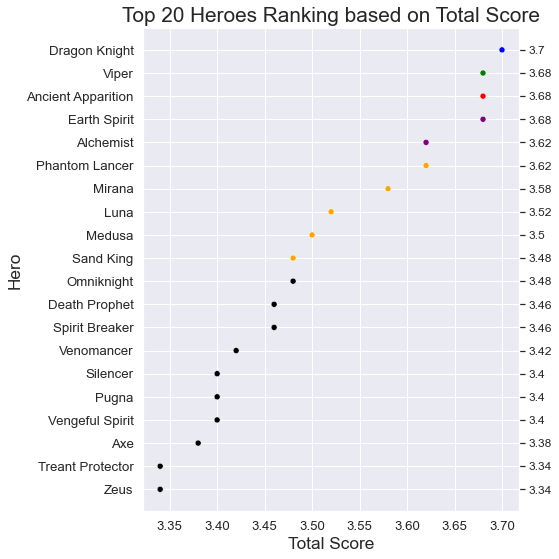

In [47]:
# Define custom color mapping for different rank ranges
# Define color mappings for ranks
base_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple',
    5: 'purple',
    6: 'orange',
    7: 'orange',
    8: 'orange',
    9: 'orange',
    10: 'orange',
}

# Define the default color for ranks above 10
default_color = 'black'

# Generate rank_colors using dictionary comprehension
rank_colors = {rank: base_colors.get(rank, default_color) for rank in range(1, 21)}

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(data=heroes_ranking[:20], x='total_score', y='localized_name', hue='rank', palette=rank_colors, legend=False)

# Add score information on the right side as Y-axis
right_ax = ax.secondary_yaxis('right')
right_ax.set_yticks(range(len(heroes_ranking)))
right_ax.set_yticklabels(heroes_ranking['total_score'], fontsize=12)

# Customize labels, title, etc. if needed
ax.set_xlabel('Total Score', fontsize='large')
ax.set_ylabel('Hero', fontsize='large')
ax.set_title('Top 20 Heroes Ranking based on Total Score', fontsize='x-large')

# Display the plot
plt.tight_layout()  # Adjust spacing to prevent overlapping labels
plt.show()

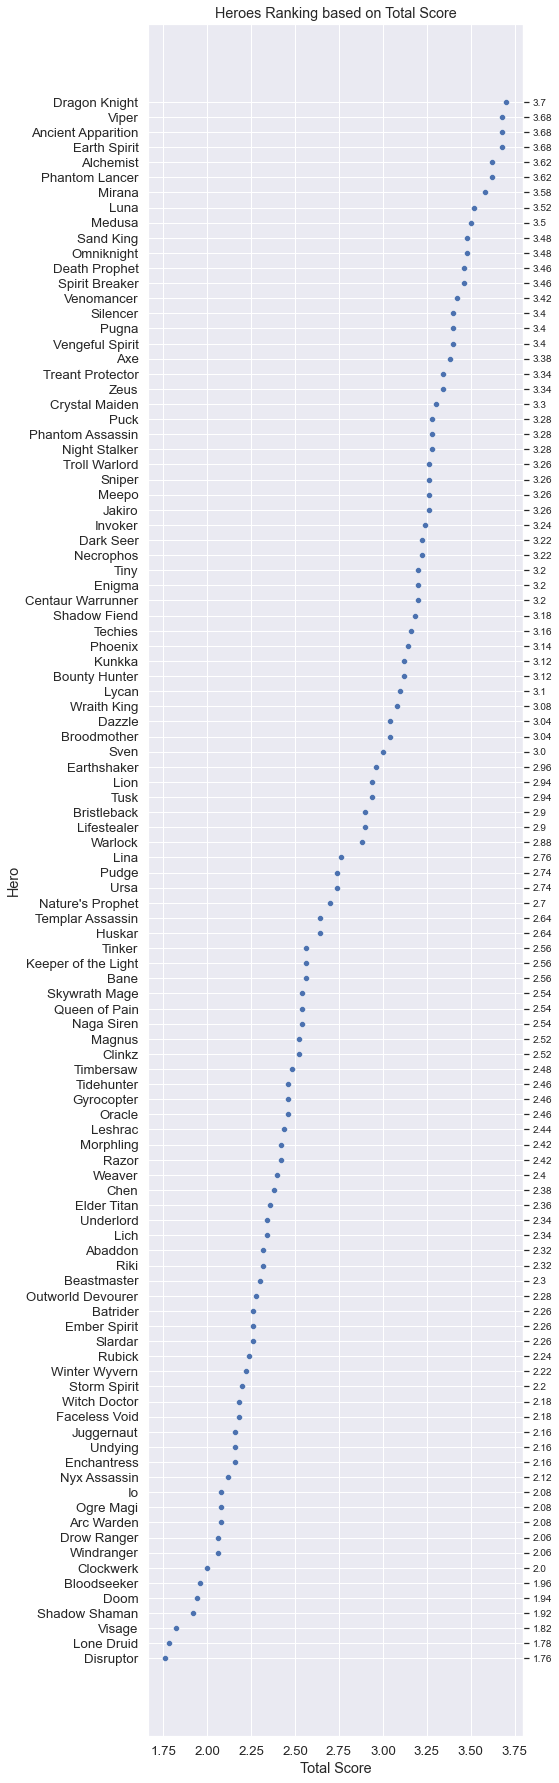

In [48]:
# Vizualize all Heroes scoring with sns
plt.figure(figsize=(8, 25))
ax = sns.scatterplot(data=heroes_ranking, x='total_score', y='localized_name')

# Add score information on the right side as Y-axis
right_ax = ax.secondary_yaxis('right')
right_ax.set_yticks(range(len(heroes_ranking)))
right_ax.set_yticklabels(heroes_ranking['total_score'], fontsize=10)

# Customize labels, title, etc. if needed
ax.set_xlabel('Total Score')
ax.set_ylabel('Hero')
ax.set_title('Heroes Ranking based on Total Score')

# Display the plot
plt.tight_layout()  # Adjust spacing to prevent overlapping labels
plt.show()